In [1]:
!python -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!SET PATH=C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v10.1\bin;%PATH%
!SET PATH=C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v10.1\extras\CUPTI\lib64;%PATH%
!SET PATH=C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v10.1\include;%PATH%
!SET PATH=C:\tools\cuda\bin;%PATH%

In [3]:
!python -m pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [1]:
!python -m pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=3c5b046c6e3443bfa9330227d206975c1609829c2c402242a2526fa4735c4148
  Stored in directory: c:\users\akiraraiku\appdata\local\pip\cache\wheels\23\9d\42\5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn


In [2]:
import sys, matplotlib, numpy as np, pandas as pd, seaborn, tensorflow as tf, sklearn
import tensorflow.keras as keras

In [3]:
from zipfile import ZipFile
with ZipFile("online_video_dataset.zip", 'r') as zip:
    zip.extractall()

In [3]:
trans_mesure = pd.read_csv("transcoding_mesurment.tsv", sep='\t')
yt_vid = pd.read_csv("youtube_videos.tsv", sep='\t')

In [167]:
trans_mesure.name = "transcoding_mesurment.tsv"
yt_vid.name = "youtube_videos.tsv"

In [4]:
print(open("README.txt", "r").read())

The presented dataset is composed of two tsv files named "youtube_videos.tsv" 
and "transcoding_mesurment.tsv". The first contains 10 columns of fundamental 
video characteristics for 1.6 million youtube videos; It contains YouTube video id, 
duration, bitrate(total in Kbits), bitrate(video bitrate in Kbits), 
height(in pixle), width(in pixles), framrate, estimated framerate, codec, 
category, and direct video link. This dataset can be used to gain insight
in characteristics of consumer videos found on UGC(Youtube).

The second file of our dataset contains 20 columns(see column names for names) 
which include input and output video characteristics along with their transcoding 
time and memory resource requirements while transcoding videos to diffrent but 
valid formats. The second dataset was collected based on experiments on an Intel 
i7-3720QM CPU through randomly picking two rows from the first dataset and using 
these as input and output parameters of a video transcoding applicatio

### Attribute Information:

**id** = Youtube videp id  
**duration** = duration of video  
**bitrate** bitrate(video) = video bitrate  
**height** = height of video in pixles  
**width** = width of video in pixles  
**frame rate** = actual video frame rate  
**frame rate(est.)** = estimated video frame rate  
**codec** = coding standard used for the video  
**category** = YouTube video category  
**url** = direct link to video (has expiration date)  
**i** = number of i frames in the video  
**p** = number of p frames in the video  
**b** = number of b frames in the video  
**frames** = number of frames in video  
**i_size** = total size in byte of i videos  
**p_size** = total size in byte of p videos  
**b_size** = total size in byte of b videos  
**size** = total size of video  
**o_codec** = output codec used for transcoding  
**o_bitrate** = output bitrate used for transcoding  
**o_framerate** = output framerate used for transcoding  
**o_width** = output width in pixel used for transcoding  
**o_height** = output height used in pixel for transcoding  
**umem** = total codec allocated memory for transcoding  
**utime** = total transcoding time for transcoding  

In [165]:
print(trans_mesure.shape)
print(trans_mesure.columns.values)
trans_mesure

(68784, 21)
['id' 'duration' 'codec' 'width' 'height' 'bitrate' 'framerate' 'i' 'p'
 'b' 'frames' 'i_size' 'p_size' 'b_size' 'size' 'o_codec' 'o_bitrate'
 'o_framerate' 'o_width' 'o_height' 'umem']


,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,i_size,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem
0,04t6-jw9czg,130.356670,mpeg4,176,144,54590,12.000000,27,1537,0,...,64483,825054,0,889537,mpeg4,56000,12.00,176,144,22508
1,04t6-jw9czg,130.356670,mpeg4,176,144,54590,12.000000,27,1537,0,...,64483,825054,0,889537,mpeg4,56000,12.00,320,240,25164
2,04t6-jw9czg,130.356670,mpeg4,176,144,54590,12.000000,27,1537,0,...,64483,825054,0,889537,mpeg4,56000,12.00,480,360,29228
3,04t6-jw9czg,130.356670,mpeg4,176,144,54590,12.000000,27,1537,0,...,64483,825054,0,889537,mpeg4,56000,12.00,640,480,34316
4,04t6-jw9czg,130.356670,mpeg4,176,144,54590,12.000000,27,1537,0,...,64483,825054,0,889537,mpeg4,56000,12.00,1280,720,58528
5,04t6-jw9czg,130.356670,mpeg4,176,144,54590,12.000000,27,1537,0,...,64483,825054,0,889537,mpeg4,56000,12.00,1920,1080,102072
6,04t6-jw9czg,130.356670,mpeg4,176,144,54590,12.000000,27,1537,0,...,64483,825054,0,889537,mpeg4,56000,15.00,176,144,23132
7,04t6-jw9czg,130.356670,mpeg4,176,144,54590,12.000000,27,1537,0,...,64483,825054,0,889537,mpeg4,56000,15.00,320,240,25164
8,04t6-jw9czg,130.356670,mpeg4,176,144,54590,12.000000,27,1537,0,...,64483,825054,0,889537,mpeg4,56000,15.00,480,360,29236
9,04t6-jw9czg,130.356670,mpeg4,176,144,54590,12.000000,27,1537,0,...,64483,825054,0,889537,mpeg4,56000,15.00,640,480,34312


In [10]:
Y = trans_mesure.utime
del trans_mesure['utime']

In [103]:
yt_vid

,id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url
0,uDNj-_5ty48,267,373,274,568,320,29.97,0.00,h264,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
1,uDNj-_5ty48,267,512,396,480,270,29.97,29.97,h264,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
2,uDNj-_5ty48,267,324,263,400,226,29.97,29.97,flv1,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
3,uDNj-_5ty48,267,85,55,176,144,12.00,12.00,mpeg4,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
4,WCgt-AactyY,31,1261,1183,640,480,24.00,0.00,h264,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
5,WCgt-AactyY,31,1166,1183,640,480,24.00,0.00,vp8,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
6,WCgt-AactyY,31,736,646,480,360,24.00,0.00,h264,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
7,WCgt-AactyY,31,715,641,480,360,24.00,24.00,h264,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
8,WCgt-AactyY,31,762,641,480,360,24.00,24.00,vp8,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
9,WCgt-AactyY,31,370,305,320,240,24.00,24.00,flv1,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...


In [166]:
print(yt_vid.columns.values)
yt_vid.shape

['id' 'duration' 'bitrate' 'bitrate(video)' 'height' 'width' 'frame rate'
 'frame rate(est.)' 'codec' 'category' 'url']


(168286, 11)

In [ ]:
yt_vid.

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(trans_mesure, Y, train_size = 0.8, test_size = 0.2)

In [106]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

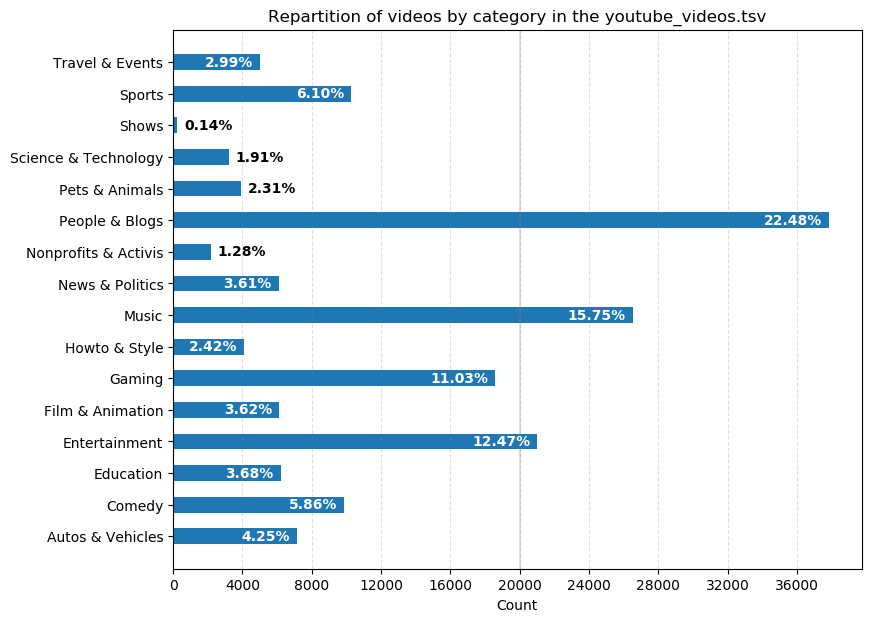

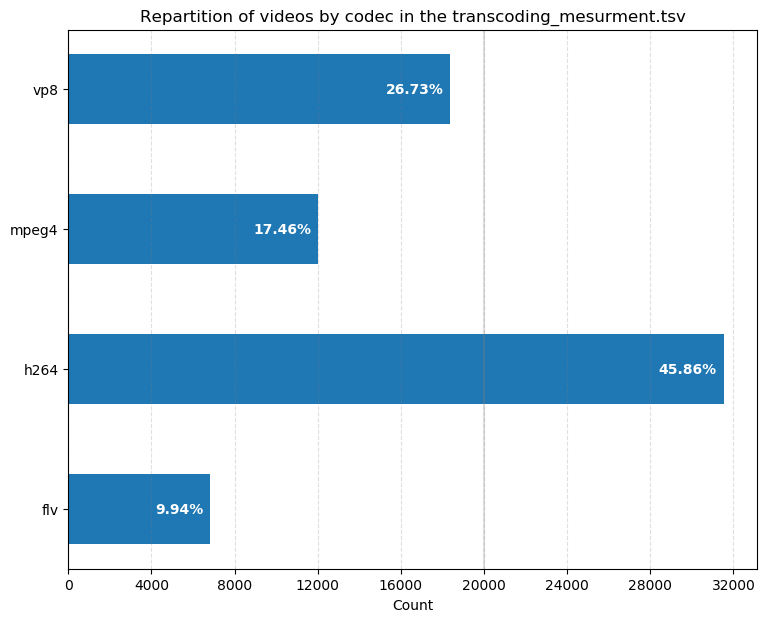

In [177]:
import re
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


def attach_percentage(num):
    """helper function to convert percentage fractions to string

    0.224. -> 22.4%
    """
    return re.findall(pattern="\d*[.]\d{1,2}", string=str(100 * num))[0] + '%'

def bar_plot_qualitative(dataset, column):
    #  create the figure
    fig, ax1 = plt.subplots(figsize=(9, 7))
    fig.subplots_adjust(left=0.115, right=0.88)
    fig.canvas.set_window_title('project figure')
    
    categories = pd.unique(dataset[column])
    count = dataset.groupby(column)[column].count()

    pos = np.arange(len(categories))
    
    rects = ax1.barh(pos, count,
                     align='center',
                     height=0.5,
                     tick_label=count.axes[0])

    ax1.set_title("Repartition of videos by {1} in the {0}".format(dataset.name,column))

    ax1.xaxis.set_major_locator(MaxNLocator(11))
    ax1.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)

    ax1.axvline(20000, color='grey', alpha=0.25)
    ax1.set_xlabel('Count')
    rect_labels = []
    
    for rect in rects:
        width = int(rect.get_width())
        
        rankStr = attach_percentage(width/count.sum())
        if width < 4000:
            xloc = 5
            clr = 'black'
            align = 'left'
        else:
            xloc = -5
            clr = 'white'
            align = 'right'
            
        yloc = rect.get_y() + rect.get_height() / 2
        label = ax1.annotate(rankStr, xy=(width, yloc), xytext=(xloc, 0),
                            textcoords="offset points",
                            ha=align, va='center',
                            color=clr, weight='bold', clip_on=True)
        rect_labels.append(label)

    return {'fig': fig,
            'ax': ax1,
            'bars': rects,
            'perc_labels': rect_labels}

yt_category_plot = bar_plot_qualitative(yt_vid,'category')
transcoding_codec_plot = bar_plot_qualitative(trans_mesure,'codec')

plt.show()

I used [this](https://matplotlib.org/3.1.1/gallery/statistics/barchart_demo.html#sphx-glr-gallery-statistics-barchart-demo-py) to inspire myself on how to do this plot.